In [1]:
from copy import deepcopy
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from gpalib import model

In [2]:
"""Display settings"""
pd.options.display.float_format = '{:,.3f}'.format
pd.options.display.max_columns = 300

In [3]:
RANDOM_SEED = 42

In [4]:
data = pd.read_csv('../data/russia-16-19-v2.5.csv')
print(data.shape)
data.head()

(308257, 187)


,sup_running_cntr_num,sup_cntr_avg_price,sup_cntr_avg_penalty_share,sup_no_pnl_share,sup_sim_price_share,sup_good_cntr_share,sup_fed_cntr_share,sup_sub_cntr_share,sup_mun_cntr_share,org_cntr_num,org_cntr_avg_price,org_sim_price_share,org_type,org_ter,org_good_cntr_share,cntr_num_together,okpd_cntr_num,okpd_good_share_min,sign_month,cntr_okpd_num,plan_cntr_len,day_price,purch_type,cntr_lvl,okpd2_0,okpd2_10,okpd2_11,okpd2_12,okpd2_13,okpd2_14,okpd2_15,okpd2_16,okpd2_17,okpd2_18,okpd2_19,okpd2_20,okpd2_21,okpd2_22,okpd2_23,okpd2_24,okpd2_25,okpd2_26,okpd2_27,okpd2_28,okpd2_29,okpd2_30,okpd2_31,okpd2_32,okpd2_33,okpd2_35,okpd2_36,okpd2_37,okpd2_38,okpd2_39,okpd2_41,okpd2_42,okpd2_43,okpd2_45,okpd2_46,okpd2_47,okpd2_49,okpd2_50,okpd2_51,okpd2_52,okpd2_53,okpd2_55,okpd2_56,okpd2_58,okpd2_59,okpd2_60,okpd2_61,okpd2_62,okpd2_63,okpd2_64,okpd2_65,okpd2_66,okpd2_68,okpd2_69,okpd2_70,okpd2_71,okpd2_72,okpd2_73,okpd2_74,okpd2_75,okpd2_77,okpd2_78,okpd2_79,okpd2_80,okpd2_81,okpd2_82,okpd2_84,okpd2_85,okpd2_86,okpd2_87,okpd2_88,okpd2_89,okpd2_90,okpd2_91,okpd2_93,okpd2_94,okpd2_95,okpd2_96,okpd2_97,okpd2_98,okpd2_99,socs_0,socs_10,socs_11,socs_12,socs_13,socs_14,socs_15,socs_16,socs_17,socs_18,socs_19,socs_20,socs_21,socs_22,socs_23,socs_24,socs_25,socs_26,socs_27,socs_28,socs_29,socs_30,socs_31,socs_32,socs_33,socs_35,socs_36,socs_37,socs_38,socs_39,socs_41,socs_42,socs_43,socs_45,socs_46,socs_47,socs_49,socs_50,socs_51,socs_52,socs_53,socs_55,socs_56,socs_58,socs_59,socs_60,socs_61,socs_62,socs_63,socs_64,socs_65,socs_66,socs_68,socs_69,socs_70,socs_71,socs_72,socs_73,socs_74,socs_75,socs_77,socs_78,socs_79,socs_80,socs_81,socs_82,socs_84,socs_85,socs_86,socs_87,socs_88,socs_89,socs_90,socs_91,socs_93,socs_94,socs_95,socs_96,socs_97,socs_98,socs_99,cntr_result
0,1.609,12.380,0.000,1,0.071,0.643,0.071,0.571,0.357,4.174,11.224,0.185,18,67664,0.662,0.693,11.278,0.542,5,0.000,4.394,5.758,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.429,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0
1,4.812,13.697,0.000,1,0.067,0.778,0.400,0.222,0.378,5.442,12.430,0.113,30,67180,0.883,0.000,12.405,0.538,3,0.000,5.666,5.572,6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.511,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1
2,1.609,13.847,0.000,1,0.882,0.941,0.000,0.000,1.000,3.091,13.283,0.091,16,52601,0.818,0.000,10.036,0.640,5,0.000,5.394,8.309,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0

In [ ]:
from gpalib import analysis

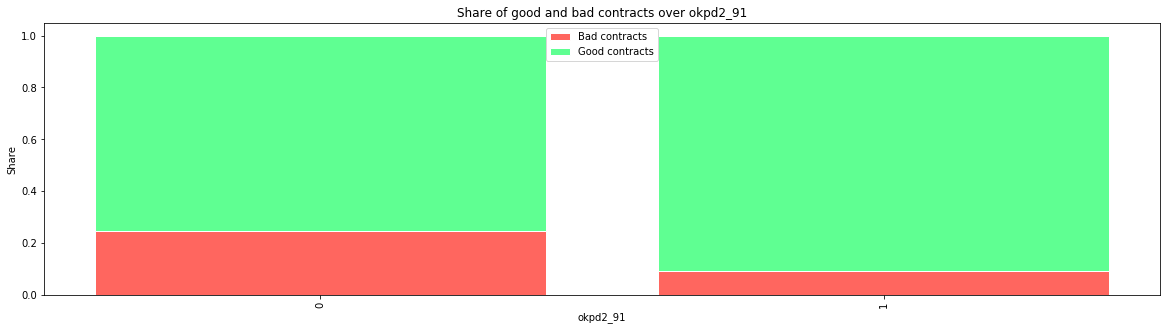

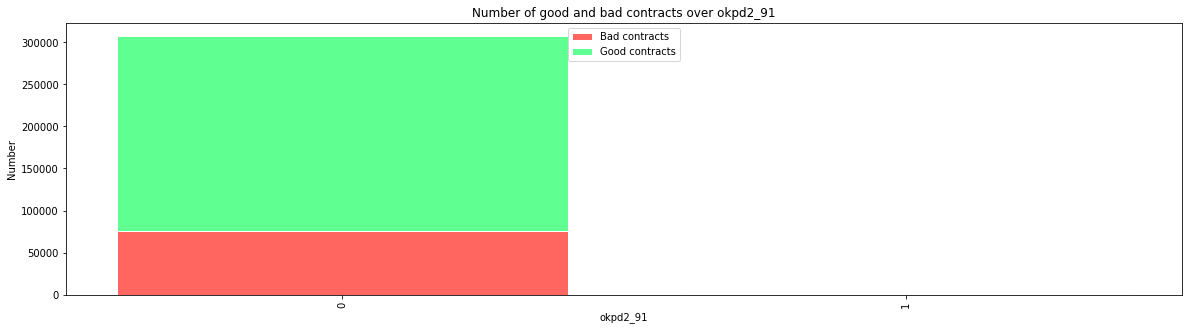

In [10]:
analysis.cntr_distrib_over_cat_var(data, 'okpd2_91')
analysis.cntr_distrib_over_cat_var(data, 'okpd2_91', percent=False)

In [5]:
with open('parameter_tuning_logs.txt', 'r', encoding='utf-8') as file:
    for line in file:
        print(line.strip())

New best: -0.31090 using {'C': 6.9, 'penalty': 'l2', 'solver': 'liblinear', 'type': 'LogReg'}
New best: -0.31104 using {'C': 0.435, 'penalty': 'l1', 'solver': 'saga', 'type': 'LogReg'}
New best: -0.31099 using {'C': 2.1, 'penalty': 'l1', 'solver': 'liblinear', 'type': 'LogReg'}
New best: -0.31085 using {'C': 7.97, 'penalty': 'l1', 'solver': 'saga', 'type': 'LogReg'}
New best: -0.29709 using {'criterion': 'gini', 'max_depth': 19, 'max_features': 'log2', 'n_estimators': 70, 'type': 'RandForest'}
New best: -0.25977 using {'criterion': 'gini', 'max_depth': 8, 'max_features': 40, 'n_estimators': 500, 'type': 'RandForest'}
New best: -0.22143 using {'criterion': 'entropy', 'max_depth': 17, 'max_features': 25, 'n_estimators': 40, 'type': 'RandForest'}
New best: -0.21668 using {'criterion': 'gini', 'max_depth': 15, 'max_features': 35, 'n_estimators': 40, 'type': 'RandForest'}
New best: -0.21599 using {'criterion': 'entropy', 'max_depth': 17, 'max_features': 30, 'n_estimators': 30, 'type': 'Rand

### Best params for LogReg, RandForest, XGBoost
1. LogReg 
    - (**ll = 0.31**): `{'C': 2, 'penalty': 'l1', 'solver': 'liblinear'}`
    - (**ll = 0.31**): `{'C': 8, 'penalty': 'l1', 'solver': 'saga'}`<br><br>
2. RandomForest 
    - (**ll = 0.26**): `{'criterion': 'gini', 'max_depth': 8, 'max_features': 40, 'n_estimators': 500}`. This model should be better because it is not common to use deep trees in RandomForest. Likely, second model will overfit. 
    - (**ll = 0.2**): `{'criterion': 'entropy', 'max_depth': 19, 'max_features': 45, 'n_estimators': 80}`. This model demonstrates the least log_loss, but likely it will be bad in generalizing knowledge. Let's check.<br><br>
3. XGBoost 
    - (**ll = 0.21**): `{'eta': 0.025, 'gamma': 1.0, 'max_depth': 3, 'n_estimators': 400, 'subsample': 0.85}`
    - (**ll = 0.2**): `{'eta': 0.5, 'gamma': 0.7, 'max_depth': 6, 'n_estimators': 600, 'subsample': 0.9}`
    
In total 1 model for Logistic regression, 2 for Random forest and 2 for XGBoost were chosen.

In [6]:
classifiers = [
    model.Classifier(
        LogisticRegression(
            C=2, 
            penalty='l1', 
            solver='liblinear', 
            random_state=RANDOM_SEED,
        ), 
        'LogisticRegression', 'LogReg_lib', 'LR'),
    model.Classifier(
        LogisticRegression(
            C=8, 
            penalty='l1', 
            solver='saga', 
            random_state=RANDOM_SEED,
        ), 
        'LogisticRegression', 'LogReg_saga', 'LR'),
    model.Classifier(
        RandomForestClassifier(
            n_estimators=500, 
            max_depth=8, 
            max_features=40, 
            criterion='gini',  
            random_state=RANDOM_SEED, 
            n_jobs=-1), 
        'RandomForestClassifier', 'RandForest_wide', 'RF'),
    model.Classifier(
        RandomForestClassifier(
            n_estimators=80, 
            max_depth=19, 
            max_features=45, 
            criterion='entropy',  
            random_state=RANDOM_SEED, 
            n_jobs=-1), 
        'RandomForestClassifier', 'RandForest_deep', 'RF'),
    model.Classifier(
        XGBClassifier(
            eta=0.025,
            gamma=1.0,
            max_depth=3,
            n_estimators=400,
            subsample=0.85,
            random_state=RANDOM_SEED, 
            n_jobs=-1), 
        'XGBoostClassifier', 'XGBoost-3-400', 'XGB'),
    model.Classifier(
        XGBClassifier(
            eta=0.5,
            gamma=0.7,
            max_depth=6,
            n_estimators=600,
            subsample=0.9,
            random_state=RANDOM_SEED, 
            n_jobs=-1), 
        'XGBoostClassifier', 'XGBoost-6-600', 'XGB'),
]

In [7]:
valid_data = data.sample(frac=0.2, random_state=RANDOM_SEED)
train_data = data.drop(valid_data.index, axis=0)

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
%%time
scores = {}
metrics = ('roc_auc', 'accuracy', 'neg_log_loss')

for clf in classifiers:
    score = model.cross_validate(clf, train_data, metrics, cv=2, prefix='cm')
    scores[clf.short_name] = score

LogReg_lib: fold 1
LogReg_lib: fold 2
LogReg_saga: fold 1
LogReg_saga: fold 2
RandForest_wide: fold 1
RandForest_wide: fold 2
RandForest_deep: fold 1
RandForest_deep: fold 2
XGBoost-3-400: fold 1
XGBoost-3-400: fold 2
XGBoost-6-600: fold 1
XGBoost-6-600: fold 2
CPU times: user 48min 46s, sys: 1min 27s, total: 50min 13s
Wall time: 44min 54s


In [10]:
model.transform_cros_val_scores(scores)

,model,time,tst_acc,tst_acc_std,tst_auc,tst_auc_std,tst_ll,tst_ll_std,tr_acc,tr_acc_std,tr_auc,tr_auc_std,tr_ll,tr_ll_std
0,LogReg_lib,138.500,0.859,0.001,0.916,0.001,-0.311,0.001,0.859,0.000,0.917,0.000,-0.309,0.000
1,LogReg_saga,51.500,0.858,0.001,0.916,0.001,-0.311,0.001,0.859,0.000,0.917,0.000,-0.309,0.000
2,RandForest_wide,91.500,0.895,0.000,0.952,0.000,-0.260,0.001,0.899,0.000,0.957,0.000,-0.253,0.001
3,RandForest_deep,26.500,0.911,0.000,0.967,0.000,-0.202,0.001,0.978,0.000,0.998,0.000,-0.109,0.001
4,XGBoost-3-400,253.500,0.904,0.000,0.963,0.000,-0.208,0.000,0.909,0.000,0.967,0.000,-0.199,0.001
5,XGBoost-6-600,580.500,0.911,0.000,0.968,0.000,-0.196,0.000,0.948,0.000,0.988,0.000,-0.135,0.001


**Findings:**
- LogReg_lib - the same as LogReg_saga but 3-times slower learner
- **LogReg_saga - the third best model**
- **RandForest_wide - the second best model**
- RandForest_deep - overfitting
- **XGBoost-3-400 - the best model**
- XGBoost-6-600 - overfitting

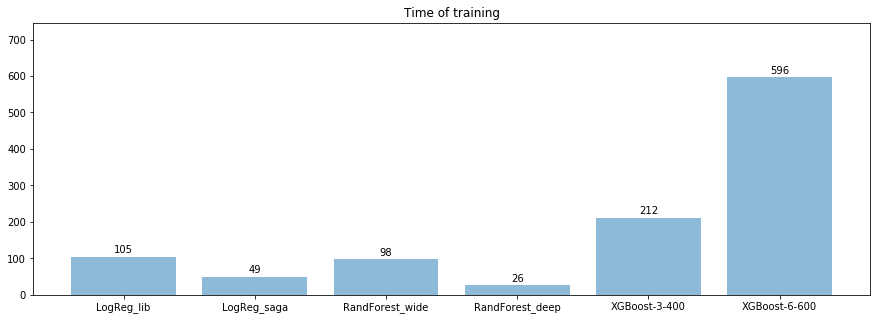

In [11]:
model.plot_training_time(classifiers, figsize=(15, 5))

In [12]:
res = model.feature_importance(classifiers, data)
res.head()

,LogReg_lib,LogReg_saga,RandForest_wide,RandForest_deep,XGBoost-3-400,XGBoost-6-600
0,sign_month: -7.57,sup_fed_cntr_share: -4.88,sup_fed_cntr_share: 0.43,sup_fed_cntr_share: 0.37,cntr_num_together: 0.15,cntr_num_together: 0.09
1,sup_fed_cntr_share: -4.87,sign_month: -4.30,cntr_num_together: 0.24,cntr_num_together: 0.18,sup_fed_cntr_share: 0.13,org_sim_price_share: 0.07
2,socs_41: -3.90,cntr_num_together: -2.12,sign_month: 0.10,sign_month: 0.06,org_good_cntr_share: 0.08,purch_type: 0.07
3,okpd2_60: -2.24,okpd2_16: -1.28,cntr_okpd_num: 0.04,cntr_okpd_num: 0.03,day_price: 0.06,day_price: 0.06
4,cntr_num_together: -2.12,okpd2_91: -1.22,org_good_cntr_share: 0.03,sup_good_cntr_share: 0.03,org_cntr_avg_price: 0.06,org_cntr_avg_price: 0.06


In [13]:
# recall_1 = “sensitivity”, recall_0 = “specificity”.
model.custom_classification_report(classifiers)

,LogReg_lib,LogReg_saga,RandForest_wide,RandForest_deep,XGBoost-3-400,XGBoost-6-600
precision_0,0.886,0.886,0.923,0.938,0.935,0.939
precision_1,0.756,0.755,0.801,0.827,0.806,0.822
recall_0,0.934,0.934,0.939,0.945,0.938,0.943
recall_1,0.629,0.630,0.759,0.806,0.799,0.813
f_score,0.687,0.687,0.779,0.816,0.802,0.818
accuracy,0.859,0.859,0.895,0.911,0.904,0.911


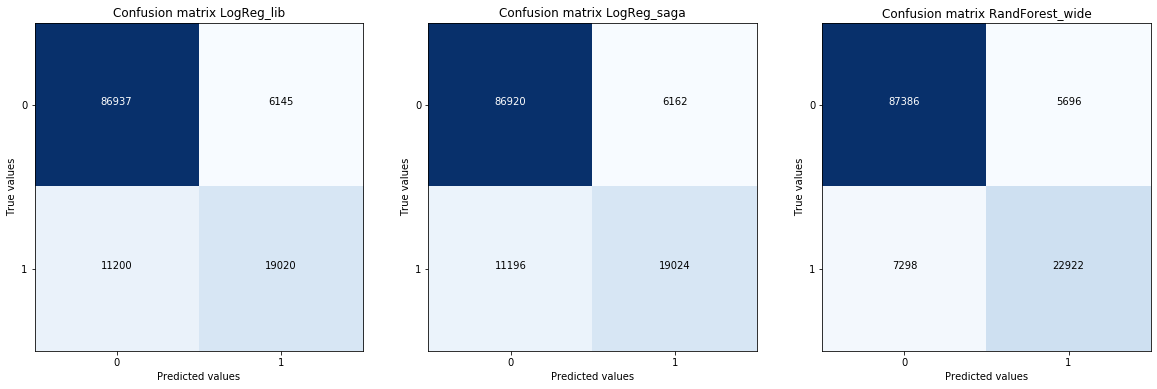

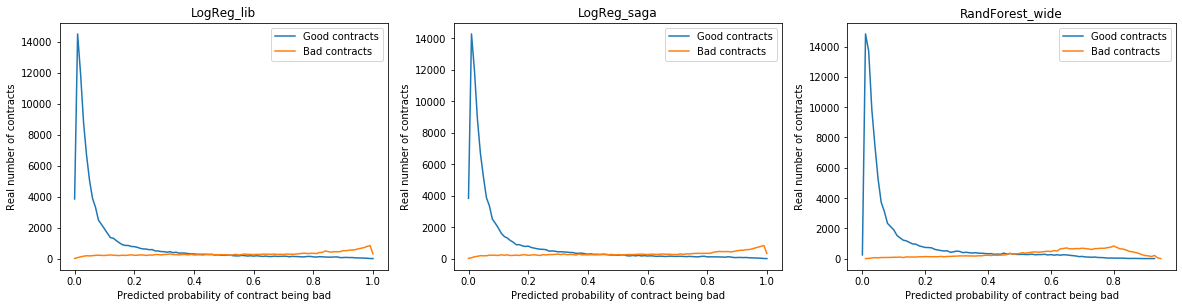

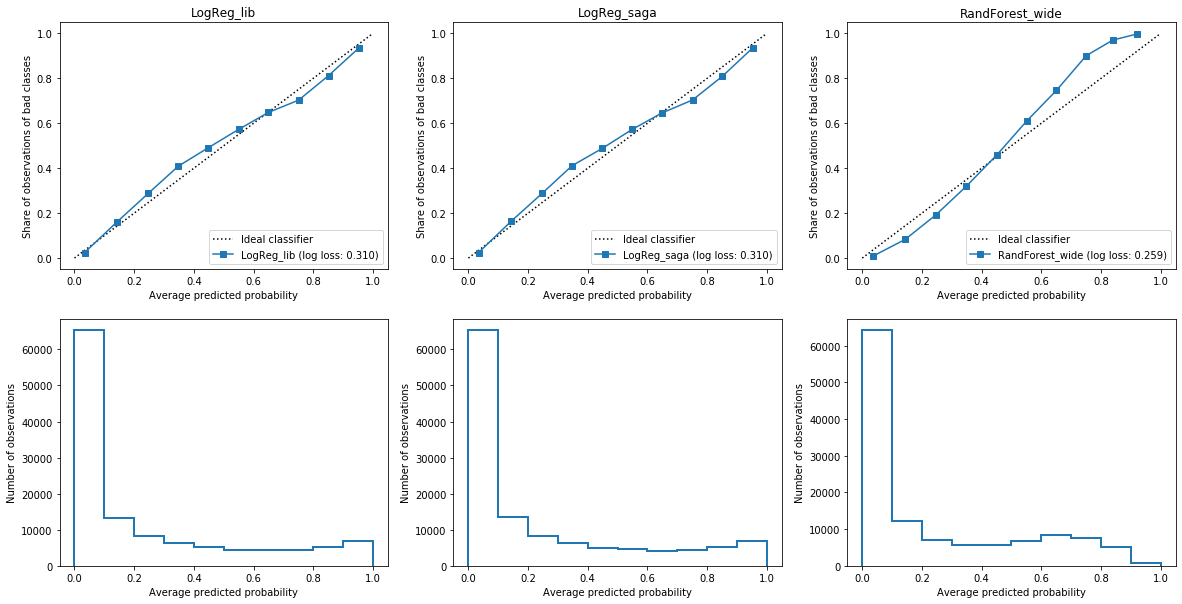

In [14]:
model.visualize_clfs_quality(classifiers[:3])

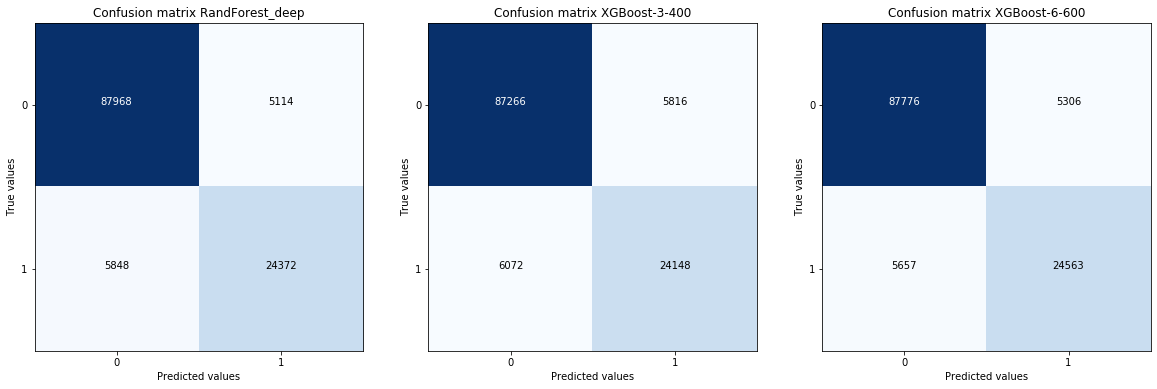

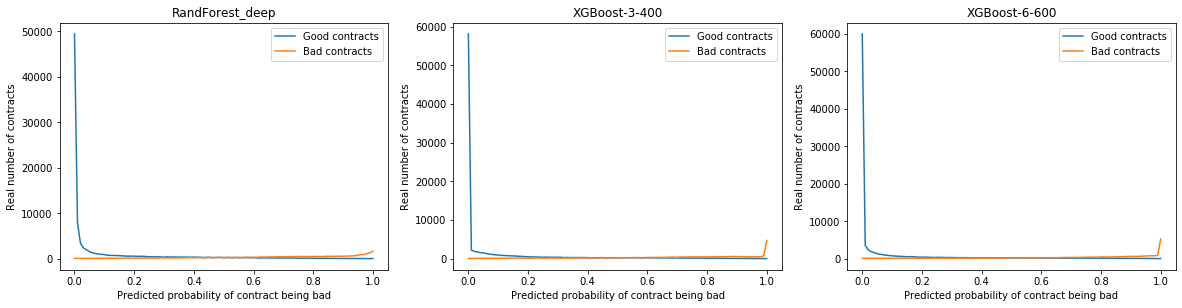

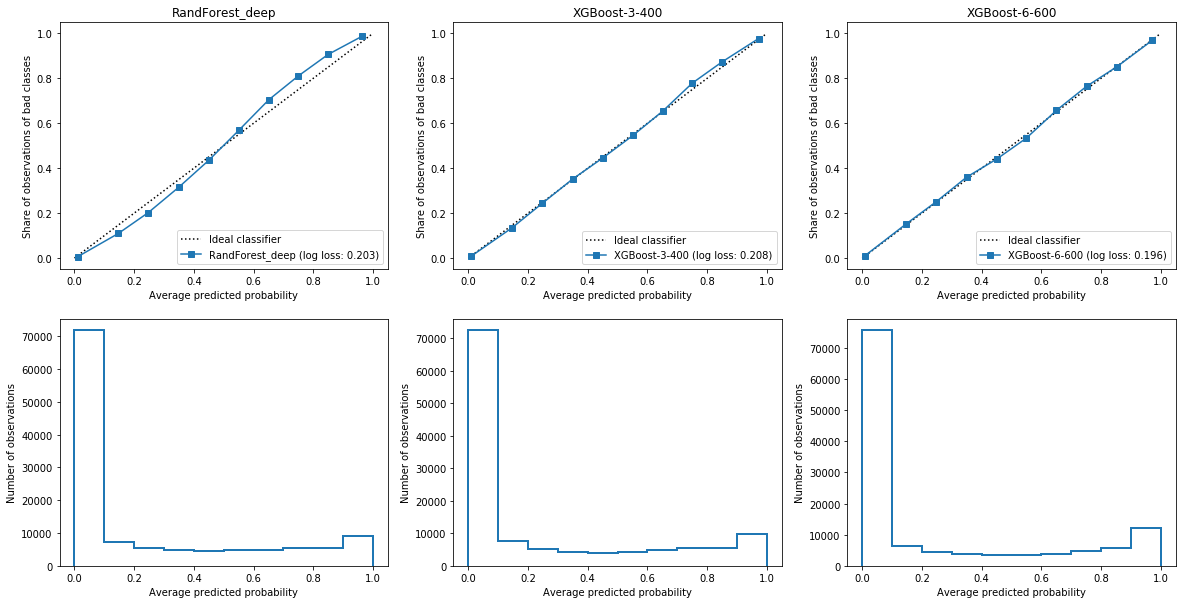

In [15]:
model.visualize_clfs_quality(classifiers[3:])

In [16]:
fnl_classifiers = deepcopy(classifiers)

In [17]:
%%time
scores_val = {}
metrics = ('roc_auc', 'accuracy', 'neg_log_loss')

for clf in fnl_classifiers:
    score = model.validate_model(clf, train_data, valid_data, metrics)
    scores_val[clf.short_name] = score

Model LogReg_lib was trained
Model LogReg_saga was trained
Model RandForest_wide was trained
Model RandForest_deep was trained
Model XGBoost-3-400 was trained
Model XGBoost-6-600 was trained
CPU times: user 47min 34s, sys: 51.7 s, total: 48min 26s
Wall time: 39min 10s


In [18]:
model.transform_cros_val_scores(scores_val)

,model,time,tst_acc,tst_acc_std,tst_auc,tst_auc_std,tst_ll,tst_ll_std,tr_acc,tr_acc_std,tr_auc,tr_auc_std,tr_ll,tr_ll_std
0,LogReg_lib,168.000,0.857,0.000,0.916,0.000,-0.311,0.000,0.859,0.000,0.916,0.000,-0.309,0.000
1,LogReg_saga,98.000,0.858,0.000,0.916,0.000,-0.311,0.000,0.859,0.000,0.916,0.000,-0.310,0.000
2,RandForest_wide,191.000,0.895,0.000,0.953,0.000,-0.258,0.000,0.897,0.000,0.955,0.000,-0.255,0.000
3,RandForest_deep,69.000,0.914,0.000,0.969,0.000,-0.196,0.000,0.966,0.000,0.995,0.000,-0.120,0.000
4,XGBoost-3-400,438.000,0.903,0.000,0.963,0.000,-0.208,0.000,0.906,0.000,0.965,0.000,-0.202,0.000
5,XGBoost-6-600,"1,222.000",0.914,0.000,0.969,0.000,-0.191,0.000,0.936,0.000,0.982,0.000,-0.153,0.000


In [19]:
model.custom_classification_report(fnl_classifiers)

,LogReg_lib,LogReg_saga,RandForest_wide,RandForest_deep,XGBoost-3-400,XGBoost-6-600
precision_0,0.885,0.885,0.925,0.941,0.935,0.942
precision_1,0.750,0.751,0.798,0.829,0.804,0.825
recall_0,0.932,0.933,0.937,0.946,0.937,0.944
recall_1,0.625,0.626,0.767,0.817,0.800,0.822
f_score,0.681,0.683,0.782,0.823,0.802,0.823
accuracy,0.857,0.858,0.895,0.914,0.903,0.914


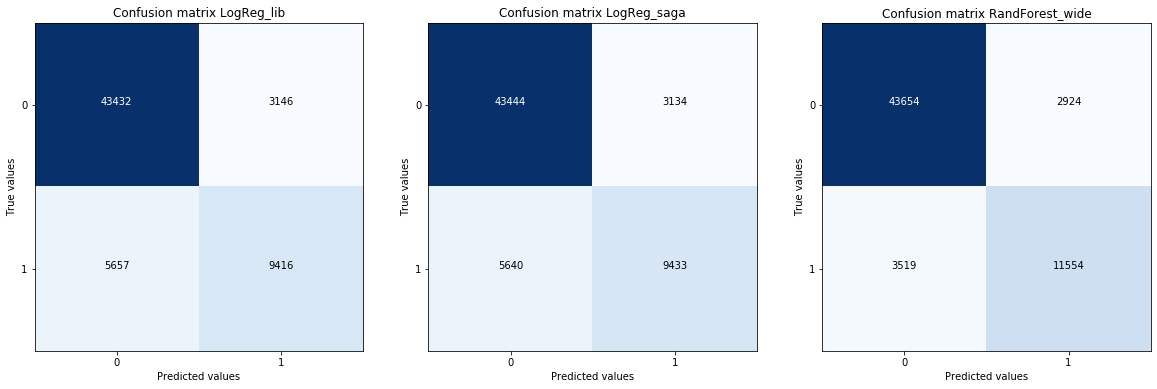

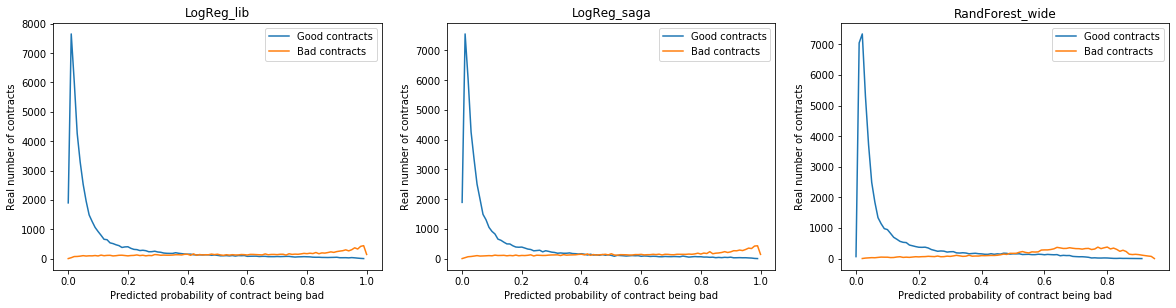

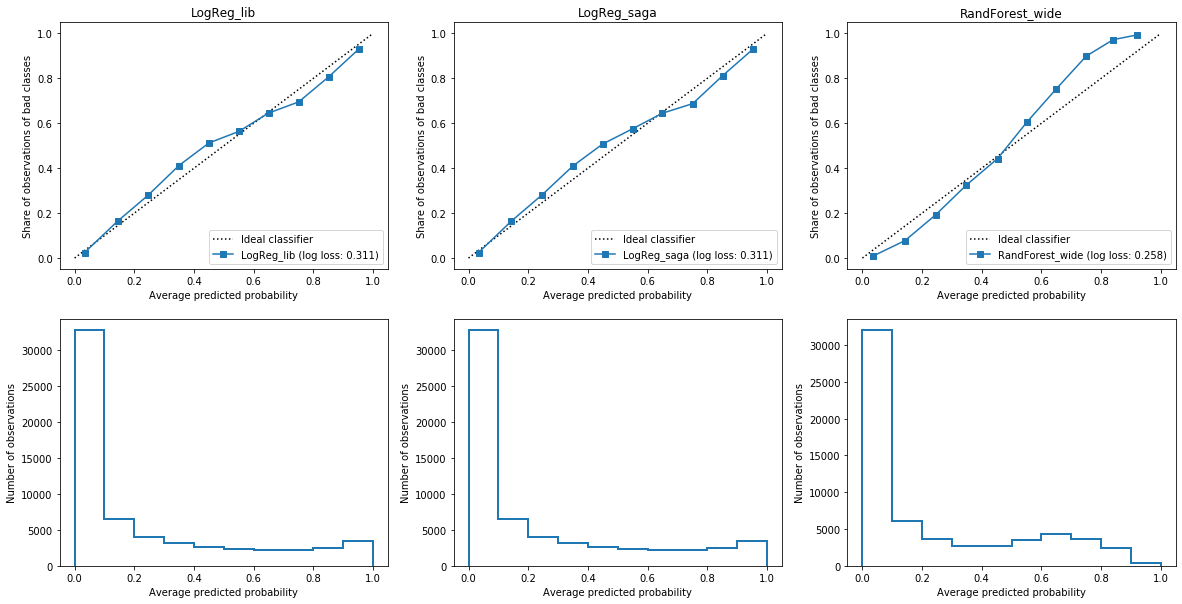

In [20]:
model.visualize_clfs_quality(fnl_classifiers[:3])

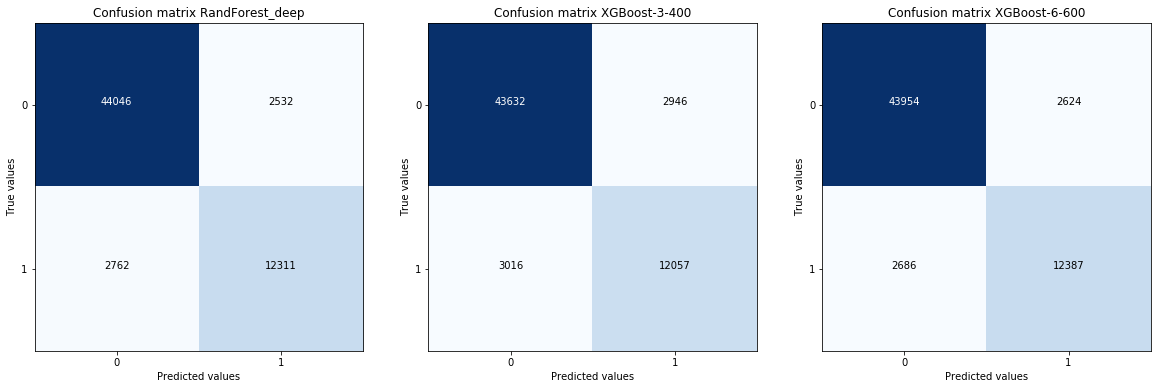

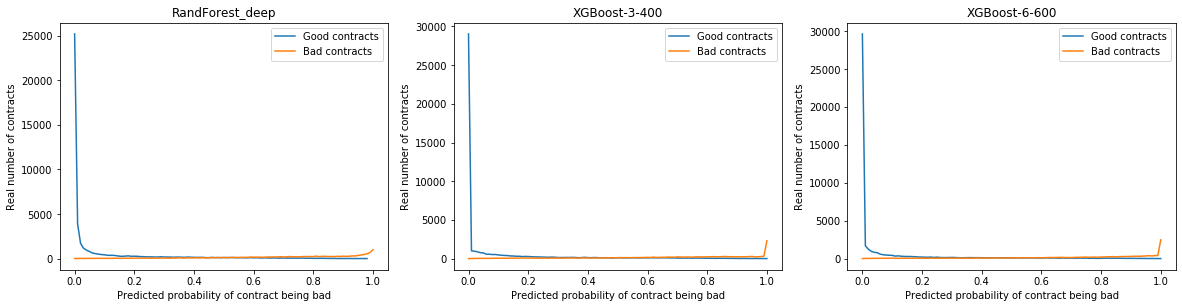

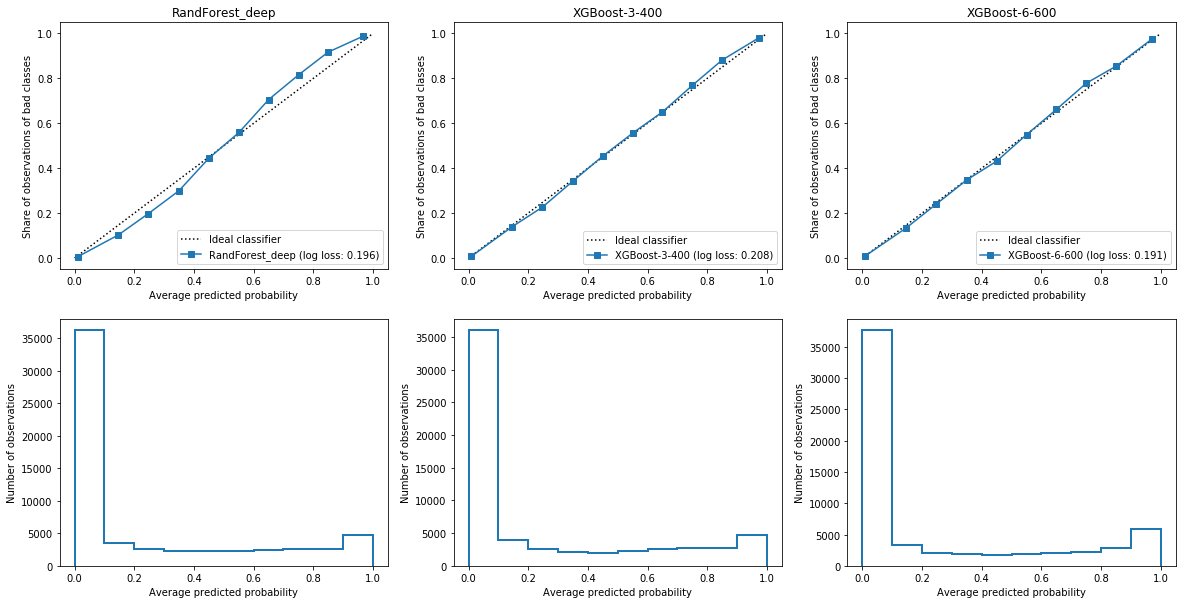

In [21]:
model.visualize_clfs_quality(fnl_classifiers[3:])